# Electric Fields

We present how to handle electric fields


The built-in electric fields are just callables, dependent on time.


In [1]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

from granad import Wave
help(Wave)

Help on function Wave in module granad.fields:

Wave(amplitudes: list[float], frequency: float)
    Function for computing time-harmonic electric fields.

    Args:
        amplitudes: electric field amplitudes in xyz-components
        frequency: frequency

    Returns:
       Function that computes the electric field as a functon of time



So, calling "Wave" gives back a function we can evaluate at single points in time

In [2]:
wave = Wave( [1, 0, 0], 1  )
print(wave(0))

[1.+0.j 0.+0.j 0.+0.j]


A quick way to visualize them is to plot their real and imaginary part. JAX offers the vmap function that vectorizes the application.

In [3]:
time = jnp.linspace(0, 2 * 2 * jnp.pi, 100)
e_field = jax.vmap( wave ) (time)
print(e_field.shape)

(100, 3)


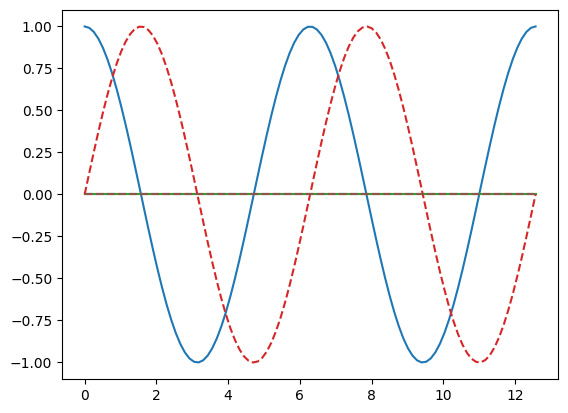

In [4]:
plt.plot(time, e_field.real)
plt.plot(time, e_field.imag, '--')
plt.show()